### Suginamiku - Analysis of Variance on Building Structure

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from pandas.plotting import scatter_matrix
from scipy import stats
from keras import backend as K

%matplotlib inline

print("Libraries imported.")
print(tf.__version__)

Libraries imported.
2.3.1


In [2]:
path = "../input/suginami-data/suginamiku_cleaned_data_1m.csv"

suginami_data = pd.read_csv(path, index_col=0)
suginami_data.head(2)

,type,transaction_period,building_structure,city_planning,construction_year,location,nearest_station,distance_to_station,area,building_age,maximum_coverage_ratio,maximum_floor_area_ratio,price
0,"Pre-owned Condominiums, etc.",1st quarter 2020,RC,Category I Exclusively Low-story Residential Zone,1984,Asagayakita,Asagaya,10,15,36,0.6,1.5,95060.0
1,"Pre-owned Condominiums, etc.",1st quarter 2020,RC,Neighborhood Commercial Zone,2006,Asagayakita,Asagaya,14,20,14,0.8,3.0,194000.0


In [3]:
suginami_data["building_structure"].value_counts()

RC         4460
SRC        1021
S            28
LS            5
SRC, RC       3
Name: building_structure, dtype: int64

In [4]:
grouped_test1 = suginami_data[["building_structure","price"]].groupby(["building_structure"])

In [5]:
f_val,p_val = stats.f_oneway(grouped_test1.get_group("RC")["price"],
                             grouped_test1.get_group("SRC")["price"],
                             grouped_test1.get_group("S")["price"],
                             grouped_test1.get_group("LS")["price"],
                             grouped_test1.get_group("SRC, RC")["price"])
print(f_val, "and", p_val)

10.407065872318867 and 2.1385606137854437e-08


In [6]:
f_val,p_val = stats.f_oneway(grouped_test1.get_group("RC")["price"],
                             grouped_test1.get_group("SRC")["price"])
print(f_val, "and", p_val)

30.77256427362715 and 3.0371016521980784e-08


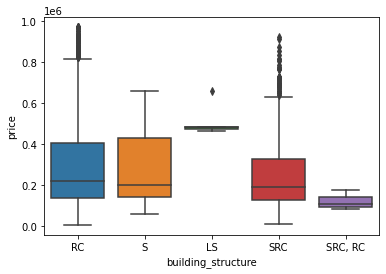

In [7]:
sns.boxplot(x="building_structure",y="price", data=suginami_data)